### Data preparation

In [54]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()    # Load the Fashion MNIST dataset

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist # Unpack the dataset

# Next two lines: Hold out las 5,000 training images for validation
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [56]:
# Scale the pixel values to be between 0 and 1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

### Creating the model using Sequential API

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),    # Flatten the input images
    tf.keras.layers.Dense(300, activation="relu"),    # First hidden layer with 300 neurons
    tf.keras.layers.Dense(100, activation="relu"),    # Second hidden layer with 100 neurons
    tf.keras.layers.Dense(10, activation="softmax")   # Output layer with 10 neurons for classification
])

/Users/theo/Desktop/theo/Uni/Second Year/Second Semester/NN & DL/Labs/venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [59]:
model.compile(
    loss="sparse_categorical_crossentropy",   # We use this Loss function because we have sparse labels (i.e. for each instance, one target class index 0-9)
    optimizer="SGD",                          # Stochastic Gradient Descent optimizer
    metrics=["accuracy"]                      # Metric to evaluate the model
)

### Training and evaluating the model

In [60]:
history = model.fit(
    X_train, y_train,                       # Training data
    epochs=30,                              # Number of epochs to train
    validation_data=(X_valid, y_valid)      # Validation data
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.6748 - loss: 1.0406 - val_accuracy: 0.8216 - val_loss: 0.5066
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8238 - loss: 0.5048 - val_accuracy: 0.8344 - val_loss: 0.4625
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.8436 - loss: 0.4513 - val_accuracy: 0.8508 - val_loss: 0.4218
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.8515 - loss: 0.4254 - val_accuracy: 0.8532 - val_loss: 0.4023
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.8562 - loss: 0.4050 - val_accuracy: 0.8414 - val_loss: 0.4398
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8644 - loss: 0.3843 - val_accuracy: 0.8604 - val_loss: 0.3875
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.8698 - loss: 0.3718 - val_accuracy: 0.8706 - val_loss: 0.3598
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8757 - los

<Axes: title={'center': 'Training and Validation Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>

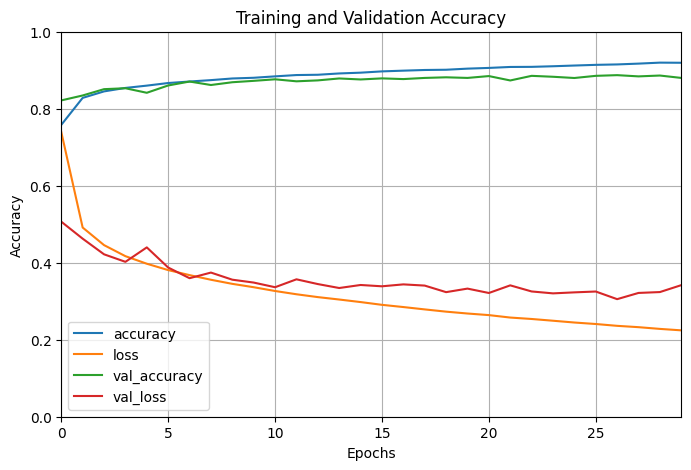

In [61]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=(0, 29),
    ylim=(0, 1),
    grid=True,
    xlabel="Epochs", 
    ylabel="Accuracy", 
    title="Training and Validation Accuracy"
)

In [62]:
model.evaluate(X_test, y_test)    # Evaluate the model on the test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8716 - loss: 0.3652


[0.36208805441856384, 0.8707000017166138]